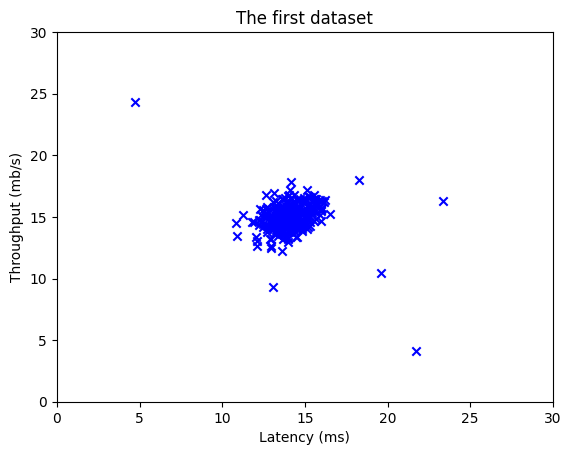

In [1]:
import numpy as np

from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

X_train, X_val, y_val = load_data()

# 展示一些数据
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')
plt.title("The first dataset")
plt.ylabel("Throughput (mb/s)")
# 延迟
plt.xlabel("Latency (ms)")
plt.axis([0, 30, 0, 30])
plt.show()

In [2]:
mu, var = estimate_gaussian(X_train)

$$
\begin{align}
X =& \left[
    \begin{array}
    x_1\\ \vdots \\ x_n
    \end{array}
\right];

\mu = \left[
    \begin{array}
    \mu_1 \\ \vdots \\ \mu_n
    \end{array}
\right];

\Sigma = \left[
    \begin{array}
    	& \sigma_{1}^{2} & \\
    	& \ddots & \\
    	& & \sigma_{n}^{2}
    \end{array}
\right]

\\
\text{令} & \bar{X}_{i} = X_{i} - \mu_{i}
\\

p(x) =& \prod_{j=1}^{n}p(x_j;\mu_j, \sigma_j^2) = \prod_{j=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma_j}\exp(-\frac{(x_j - \mu_j)^2}{2\sigma_j^2})\\
=& (2 \pi)^{-\frac{n}{2}} |\Sigma|^{-\frac{1}{2}} \exp(-\frac{1}{2}(\sum_{j=1}^{n}\frac{\bar{X}_{j}^{2}}{\sigma_{j}^{2}})) \\
& \text{转换为矩阵可以加快运算?} \\
\sum_{j=1}^{n}\frac{\bar{X}_{j}^{2}}{\sigma_{j}^{2}} =& \bar{X}^{T} \cdot \Sigma^{-1} \cdot \bar{X}
\end{align}
$$

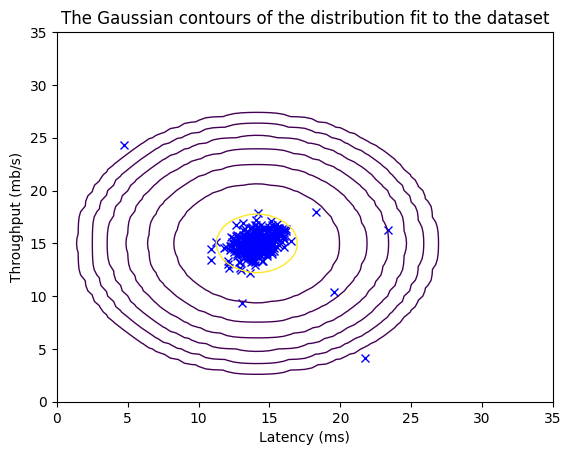

In [3]:
p = multivariate_gaussian(X_train, mu, var)

visualize_fit(X_train, mu, var)

In [4]:
p_val = multivariate_gaussian(X_val, mu, var)

epsilon, F1 = select_threshold(y_val, p_val)

epsilon, F1

/Users/wttch/workspace/PG/pythonProject/cluster/AnomalyDetection/utils.py:105: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


(8.990852779269495e-05, 0.8750000000000001)

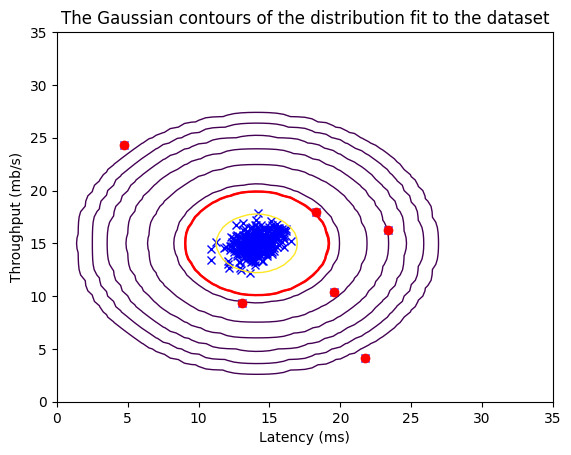

In [5]:
outliers = p < epsilon

visualize_fit(X_train, mu, var, epsilon)

plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro')

In [7]:
# 多特征
X_train_h, X_val_h, y_val_h = load_data_multi()

mu_h, var_h = estimate_gaussian(X_train_h)

p_h = multivariate_gaussian(X_train_h, mu_h, var_h)

p_val_h = multivariate_gaussian(X_val_h, mu_h, var_h)

epsilon_h, F1_h = select_threshold(y_val_h, p_val_h)

epsilon_h, F1_h

/Users/wttch/workspace/PG/pythonProject/cluster/AnomalyDetection/utils.py:105: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


(1.377228890761358e-18, 0.6153846153846154)